# Boston House Prices Prediction
- Kaggle 連結: https://www.kaggle.com/vikrishnan/boston-house-prices
    - 供參考用，本次作業使用 scikit-learn 內裝的 dataset

## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Windows|10家用版|
|程式執行環境|Google Colab||
|python 版本|python3|3.7.10|
|安裝環境|pip|19.3.1
|

In [ ]:
!python --version
!pip --version

Python 3.7.10
pip 19.3.1 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


## 安裝

請填寫安裝套件需要的指令

```sh
pip install -r requirements.txt
```

In [ ]:
pip install -r requirements.txt

## 計算資源

請填寫執行程式所需要的計算資源，請確保所有資源限制在單一個人桌上型電腦且能夠以總市價低於 5 萬的手段取得。

|計算資源|答案|
|-|-|
|使用 CPU 核心數|1|
|記憶體需求|$\leq 1$GB|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|$\leq 1$GB|

## 參考連結

- 有無參考他人之實驗結果：有
- 參考連結：


1.   https://www.kaggle.com/prasadperera/the-boston-housing-dataset
2.   https://www.kaggle.com/gulsahdemiryurek/let-s-predict-league-of-legends-match-score  

In [ ]:
import time

EXECUTION_START_TIME = time.time() # 計算執行時間

In [ ]:
# 載入必要套件

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pandas as pd

## 載入資料

In [ ]:
# 使用 scikit-learn 的資料

dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [ ]:
# 觀察資料的 key 值有哪些

dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

## 資料前處理
### TODO #1: 
- 請將資料以 Pandas 整理成 DataFrame 的型式
- 欄位名稱為 feature_names

In [ ]:
df = pd.DataFrame(
    # Please put something here.
    data = dataset.data, 
    columns = dataset.feature_names
)
pd.DataFrame(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
print("Number of features: ", len(dataset.feature_names))

Number of features:  13


In [ ]:
df['MEDV'] = dataset.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [ ]:
df.columns.values.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

### TODO #2: 請進行統計各個 feature 的缺失值數目

In [ ]:
# Please use some functions of Pandas here.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## 觀察資料的特性

### TODO #3: 利用 Seaborn 畫箱型圖，並進行說明
- 觀察每一個 features 的數值分佈
- 可以用來決定是否要對資料的數值進行標準化

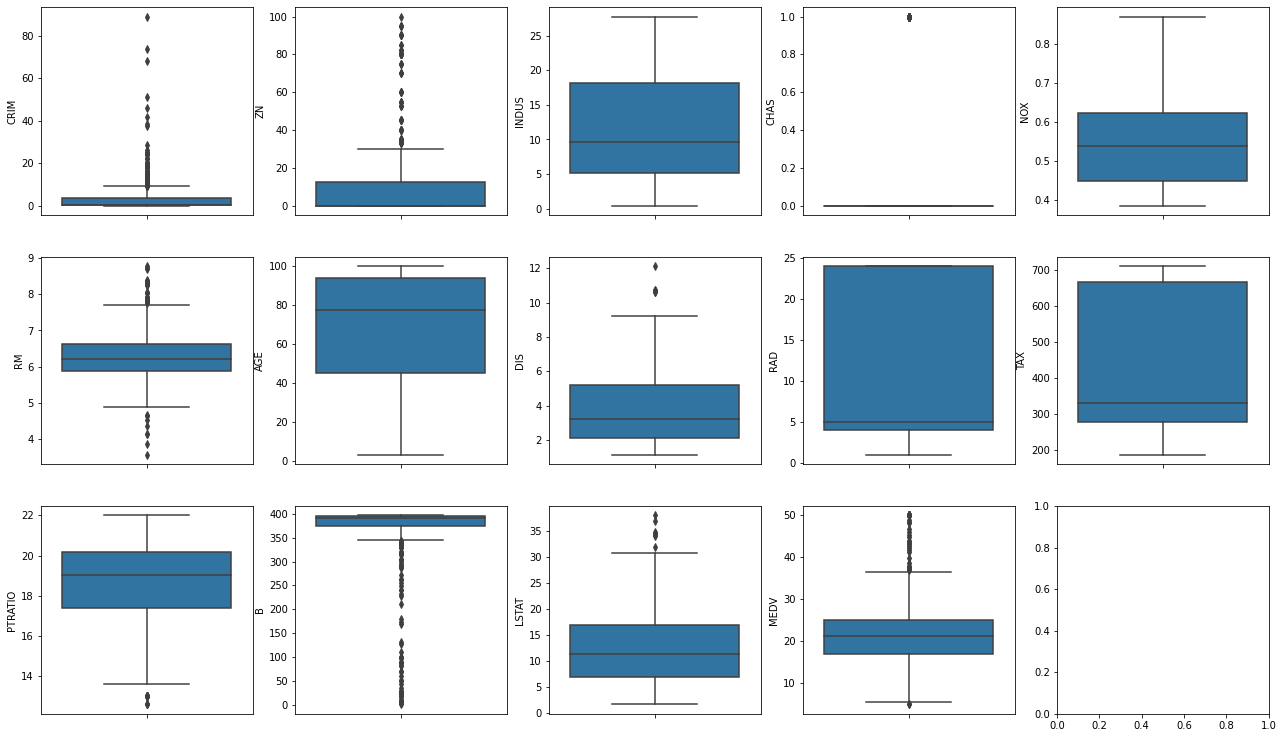

In [ ]:
# 設定圖表大小
fig, ax = plt.subplots(3,5,figsize=(22, 13)) 
# Plot a boxplot with Seaborn

for index,features in enumerate(df.columns):
  sns.boxplot(      
    # 輸入資料給箱型圖，自動計算四分位距
    y = df[features],
    ax=ax[index//5][index%5]
    )        

# 繪製圖表ㄒ
plt.show() 

可以發現CRIM ZN RM B 有較多outliers


對這4個特徵標準化前須要先處理outlier資料資料



> 使用RobustScaler調整各個特徵的範圍



In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(dataset.data)
X_scaled = pd.DataFrame(scaler.transform(dataset.data), columns = dataset.feature_names )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

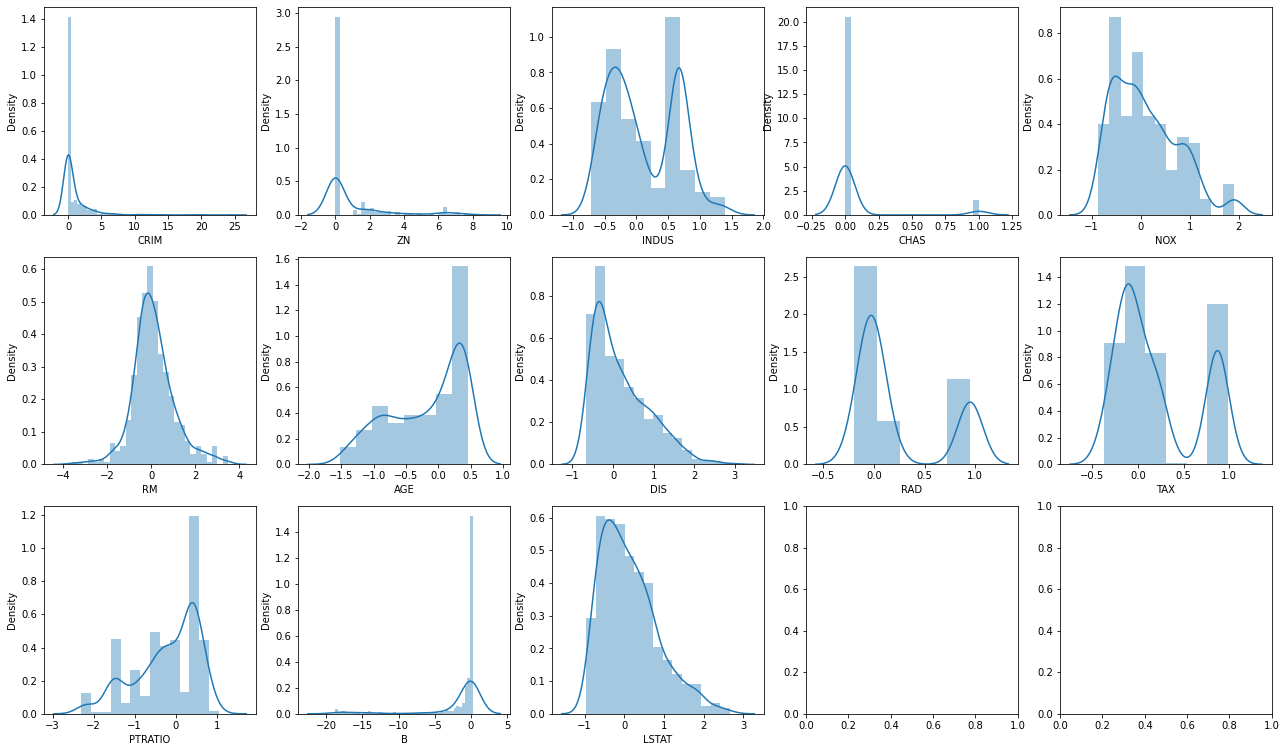

In [ ]:
# 設定圖表大小
fig, ax = plt.subplots(3,5,figsize=(22, 13)) 
# Plot a boxplot with Seaborn

for index,features in enumerate(X_scaled.columns):
  sns.distplot(      
    # 輸入資料給箱型圖，自動計算四分位距
    a = X_scaled[features],
    ax=ax[index//5][index%5]
    )        

# 繪製圖表ㄒ
plt.show() 

觀察各個特徵的分布，可發現outlier的問題還是存在

希望去除2倍4分位數以外的資料

**解決辦法:**

1.   將絕對值大於2的數據都assign成2或-2
2.   再對所有數據平移至大於0大於0



In [ ]:
for features in X_scaled.columns:
  df[features] = X_scaled[features]
  df[features].loc[X_scaled[features] > 2] = 2
  df[features].loc[X_scaled[features] < -2] = -2
  df[features] -= min(df[features])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

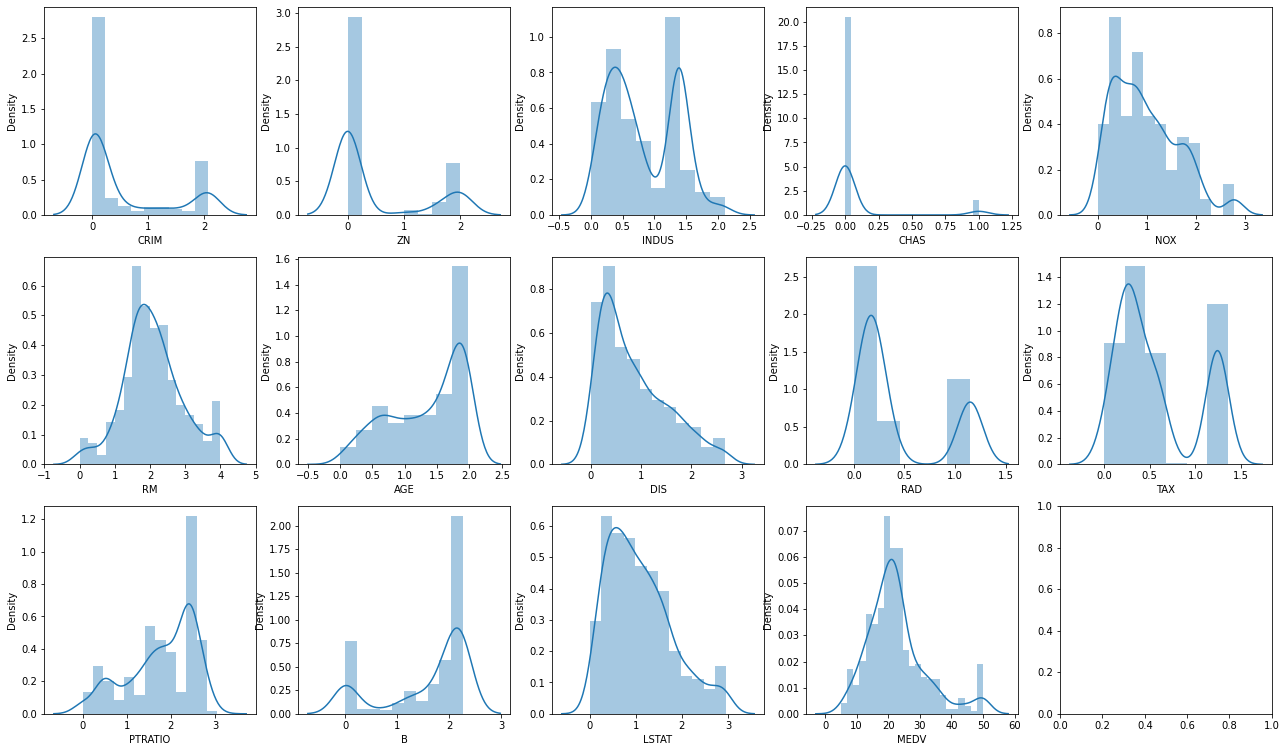

In [ ]:
# 設定圖表大小
fig, ax = plt.subplots(3,5,figsize=(22, 13)) 
# Plot a boxplot with Seaborn

for index,features in enumerate(df.columns):
  sns.distplot(      
    # 輸入資料給箱型圖，自動計算四分位距
    a = df[features],
    ax=ax[index//5][index%5]
    )        

# 繪製圖表ㄒ
plt.show() 

### TODO #4: 利用 Seaborn 進行 Heatmap 作圖，並進行說明
- 觀察每一個特徵與房價 (MEDV) 的關聯程度
- 使用 dr.corr() 來計算 feature 和 feature 之間的關係係數
- 數值愈高表示愈正相關，數值愈低表示愈負相關

             CRIM        ZN     INDUS  ...         B     LSTAT      MEDV
CRIM     1.000000 -0.388478  0.648782  ... -0.436804  0.584529 -0.446596
ZN      -0.388478  1.000000 -0.586297  ...  0.239211 -0.445553  0.376543
INDUS    0.648782 -0.586297  1.000000  ... -0.411678  0.608817 -0.483725
CHAS    -0.019751 -0.039261  0.062938  ... -0.014974 -0.053138  0.175260
NOX      0.685216 -0.543310  0.763651  ... -0.420215  0.596353 -0.427321
RM      -0.260065  0.357407 -0.409639  ...  0.192549 -0.635103  0.697815
AGE      0.530028 -0.569431  0.644779  ... -0.300920  0.607473 -0.376955
DIS     -0.567540  0.678381 -0.714460  ...  0.305728 -0.504019  0.254721
RAD      0.942058 -0.345678  0.595129  ... -0.385132  0.489185 -0.381626
TAX      0.887281 -0.396055  0.720760  ... -0.424836  0.545773 -0.468536
PTRATIO  0.419408 -0.434847  0.381678  ... -0.092385  0.377379 -0.505973
B       -0.436804  0.239211 -0.411678  ...  1.000000 -0.339811  0.257127
LSTAT    0.584529 -0.445553  0.608817  ... -0.33981

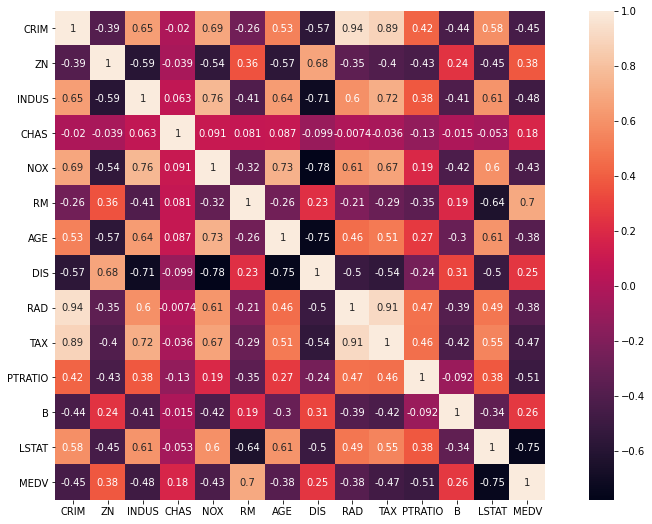

In [ ]:
plt.figure(figsize=(16, 9))
# Please use a function of Pandas here.
print(df.corr())
# Plot a heatmap with Seaborn
sns.heatmap(
    # 輸入資料給熱點圖，自動計算相關係數
    df.corr(),                      
    # 顯示每個格子所代表的數字
    annot=True,                
    # 將格子形狀調整為正方形
    square=True,               
)                

可發現CHAS DIS B 與 MEDV 相關性較小，可能不適合作為模型輸入

### TODO #5: 挑選特徵，並進行說明
- 觀察 heatmap 中具有"顯著"正相關或是"顯著"負相關的特徵
- 把這些特徵進行 concatenation，得到新的 dataframe

選擇所有相關係數>0.4的特徵

In [ ]:
x = df[['CRIM', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
y = df['MEDV']
pd.DataFrame(x)

,CRIM,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,0.000000,0.143300,0.874286,2.496612,0.281654,0.660714,0.324838
1,0.005839,0.512006,0.480000,2.287940,0.142119,1.553571,0.740630
2,0.005833,0.512006,0.480000,3.323171,0.142119,1.553571,0.229885
3,0.007246,0.133230,0.417143,3.069783,0.090439,1.875000,0.120940
4,0.017449,0.133230,0.417143,3.271680,0.090439,1.875000,0.359820
...,...,...,...,...,...,...,...
501,0.015663,0.888459,1.074286,2.521003,0.222222,2.696429,0.793603
502,0.010834,0.888459,1.074286,1.880081,0.222222,2.696429,0.734633
503,0.015143,0.888459,1.074286,3.039973,0.222222,2.696429,0.390805
504,0.028726,0.888459,1.074286,2.793360,0.222222,2.696429,0.474763


### TODO #6: 呈現特徵分佈，並進行說明
- 把你選取到的"重要特徵"進行subplots，畫出散佈圖 (scatter plots)
- 每一張圖的X軸是你選到的特徵、Y軸是房價('MEDV')

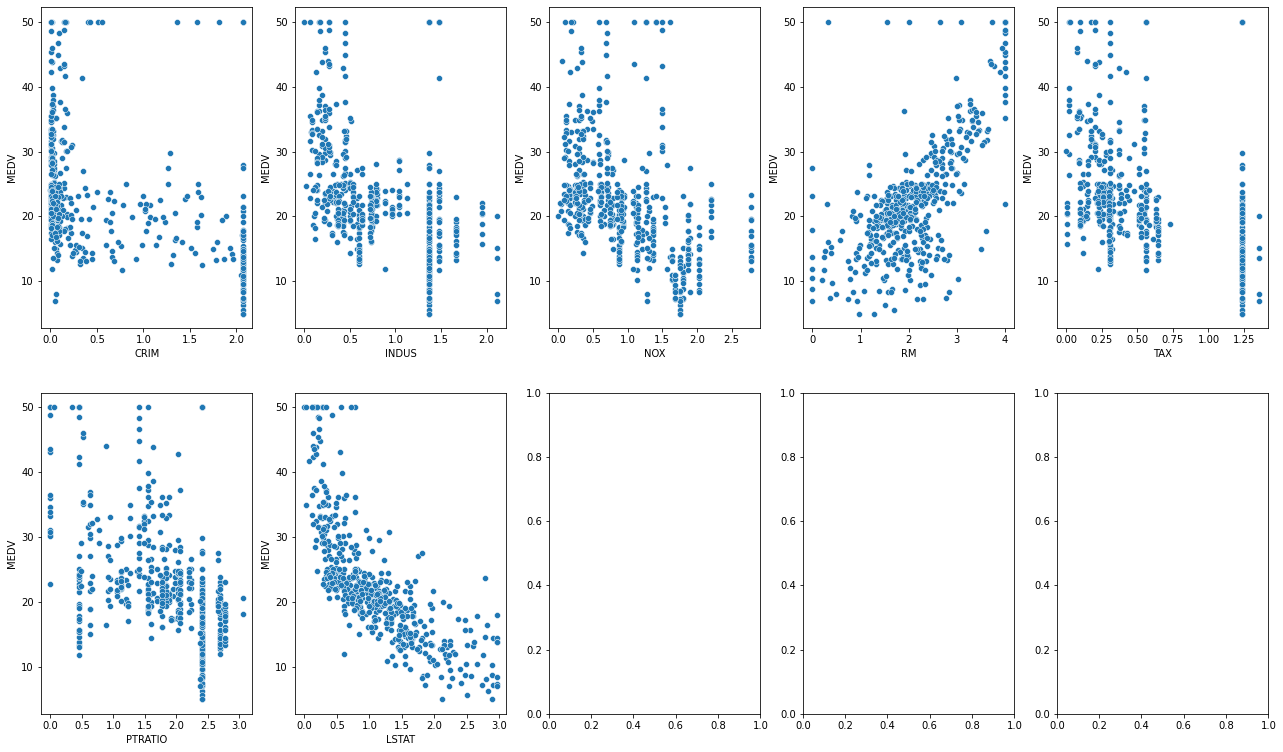

In [ ]:
# 設定圖表大小
fig, ax = plt.subplots(2,5,figsize=(22, 13)) 
# Plot a boxplot with Seaborn

for index,features in enumerate(x.columns):
  sns.scatterplot(      
    # 輸入資料給箱型圖，自動計算四分位距
    x = x[features],
    y = y,
    ax = ax[index//5][index%5]
    )        

# 繪製圖表ㄒ
plt.show() 

以肉眼觀察可看出RM 和 LSTAT有接近線性的分布，可對應到相關係數也確實較高

其他特徵較難觀察出與房價的關係

## 訓練模型前的準備
### TODO #7: 切分資料
- 利用 train_test_split，將資料切成 train set 和 test set
- 設定 train set 的比例為全部資料的 80%
- 請記得設定 random_state 以控制隨機過程

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.80, random_state = 12)

print(X_train.shape) #(404, 2)
print(X_test.shape) #(102, 2)
print(Y_train.shape) #(404, )
print(Y_test.shape) #(102, )

(379, 7)
(127, 7)
(379,)
(127,)


## 訓練模型並進行評估

### TODO #8: 訓練 Linear Regression 模型，並說明訓練結果
- 利用 scikit-learn，將資料 fit 在 LinearRegression
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

In [ ]:
# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as R2

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)

print('R2:', R2(Y_test, Y_pred))
print('MSE:', MSE(Y_test, Y_pred))

R2: 0.6086198242834829
MSE: 30.89642705992312


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


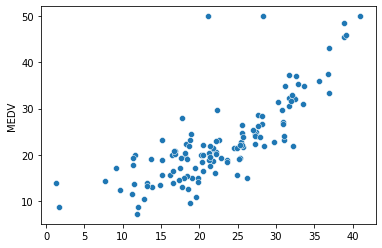

In [ ]:
# plotting the y_test vs y_pred
sns.scatterplot(Y_pred,Y_test)

Linear Regression的訓練結果滿差的，推測與上述所說'很難觀察出特徵與房價的線性關係'有關

### TODO #9: 訓練 Random Forest Regressor 模型
- 利用 scikit-learn，將資料 fit 在 RandomForestRegressor 模型
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Modeling

model_RFR = RandomForestRegressor(random_state = 12)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)
print('R2:',R2(Y_test, Y_pred))
print('MSE:',MSE(Y_test, Y_pred))

R2: 0.7827954926206078
MSE: 17.14660996062993


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


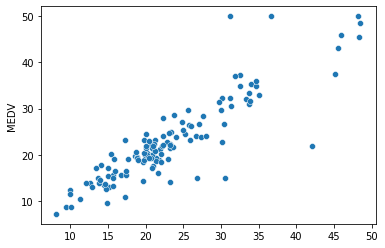

In [ ]:
# plotting the y_test vs y_pred
sns.scatterplot(Y_pred,Y_test)

比起linear regression好一點，但還是可以觀察到幾個預測差很多的點

### TODO #10: 參數調整，並進行說明
- 請嘗試使用 Grid search 來進行調參
    - 可以自己寫 for-loop
    - 或是使用 sklearn.model_selection 中的 GridSearchCV 函式

In [ ]:
from sklearn.model_selection import GridSearchCV



> **RandomForestRegressor with Grid Search Method**



In [ ]:
n_estimators = range(20,101,40)
max_depth = range(1,10,2)
max_features = range(3,8,2)
random_state = [12]
model_RFR = RandomForestRegressor()
grid_RFR = GridSearchCV(estimator = model_RFR, cv = 5, scoring='r2', 
                        param_grid = dict(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features, random_state = random_state))
grid_RFR.fit(X_train, Y_train)
best_grid_RFR = grid_RFR.best_estimator_
Y_pred = best_grid_RFR.predict(X_test)
print('R2:',R2(Y_test, Y_pred))
print('MSE:',MSE(Y_test, Y_pred))

R2: 0.810919586616228
MSE: 14.9264310331426


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


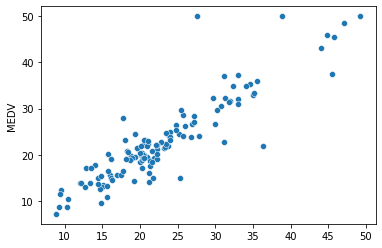

In [ ]:
# plotting the y_test vs y_pred
sns.scatterplot(Y_pred,Y_test)

比起沒有調整參數的模型準確率高3%

MSE也少了3

### TODO #11: 訓練 其他的 regression 模型，與上述兩種模型比較並說明訓練結果
- 將資料 fit 在其他的迴歸模型，可選擇 SVR、XGBRegressor 或其他...
- 利用 TODO #10 的工具來進行參數調整
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

> **GradientBoostingRegressor with Grid Search Method**

In [ ]:
n_estimators = range(20,101,40)
max_depth = range(1,10,2)
max_features = range(3,8,2)
random_state = [12]
model_GBR = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator = model_GBR, cv = 5, scoring='r2', 
                        param_grid = dict(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features, random_state = random_state))
grid_GBR.fit(X_train, Y_train)
best_grid_GBR = grid_GBR.best_estimator_
Y_pred = best_grid_GBR.predict(X_test)
print('R2:',R2(Y_test, Y_pred))
print('MSE:',MSE(Y_test, Y_pred))

R2: 0.8270683158549774
MSE: 13.651614202877647


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


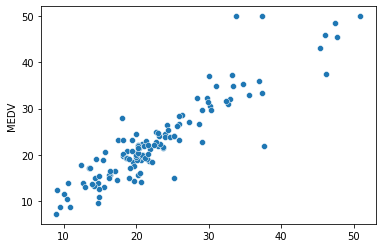

In [ ]:
# plotting the y_test vs y_pred
sns.scatterplot(Y_pred,Y_test)

GradientBoostingRegressor是效果最好的模型

> **SVR with Grid Search Method**

In [ ]:
kernel = ["rbf", "linear", "poly", "sigmoid"]
gamma = ["scale","auto"]
degree = range(1,4,1)
model_SVR = SVR()
grid_SVR = GridSearchCV(estimator = model_SVR, cv = 5, scoring='r2', param_grid = dict(kernel = kernel, gamma = gamma, degree = degree))
grid_SVR.fit(X_train, Y_train)
best_grid_SVR = grid_SVR.best_estimator_
Y_pred = best_grid_SVR.predict(X_test)
print('R2:',R2(Y_test, Y_pred))
print('MSE:',MSE(Y_test, Y_pred))

R2: 0.719645648234711
MSE: 22.131800018717012


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


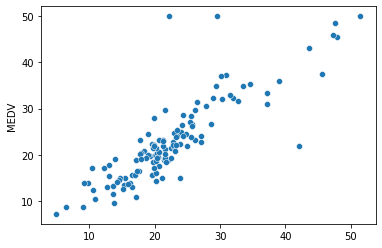

In [ ]:
# plotting the y_test vs y_pred
sns.scatterplot(Y_pred,Y_test)

SVR預測準確度不太好，觀察散佈圖也能發現MSE特別大


In [ ]:
EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 47.129053592681885
